# **Convolution**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from google.colab import drive
import cv2

In [0]:
def convolve(image, kernel):
  im_height, im_width = image.shape[:2]
  k_height, k_width = kernel.shape[:2]
  pad = (k_width-1)//2

  output = np.zeros((im_height, im_width), dtype='float32')

  new_image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)

  # start convolution
  for x in np.arange(pad, im_height+pad):
    for y in np.arange(pad, im_width+pad):
      # extract region of interest
      roi = new_image[x-pad:x+pad+1, y-pad:y+pad+1]
      k = (roi*kernel).sum()
      output[x-pad, y-pad] = k

  output = rescale_intensity(output, in_range=(0,255))
  output = (output*255).astype("uint8")
  return output

In [0]:
small_blur = np.ones((7,7), dtype='float')
large_blur = np.ones((21,21), dtype='float')
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
), dtype='float')
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
), dtype='float')
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
))
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
))

In [0]:
kernel_bank = (
    ('small_blur', small_blur),
    ('large_blur', large_blur),
    ('sharpen', sharpen),
    ('laplacian', laplacian),
    ('sobel_y', sobelY),
    ('sobel_x', sobelX)
)

In [0]:
drive.mount('/content/drive')
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/convolution/butterfly.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] Applying small_blur kernel


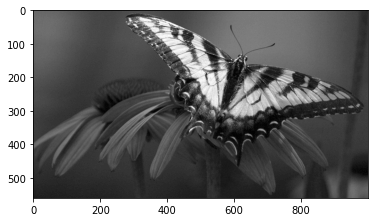

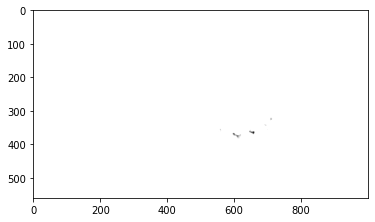

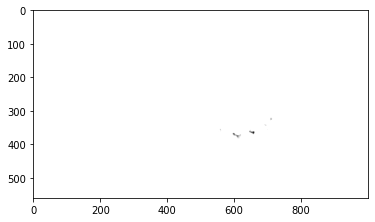

[INFO] Applying large_blur kernel


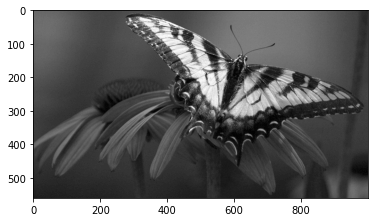

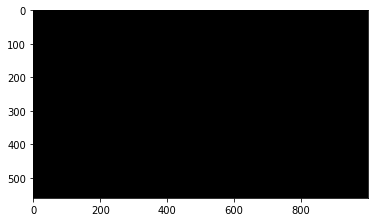

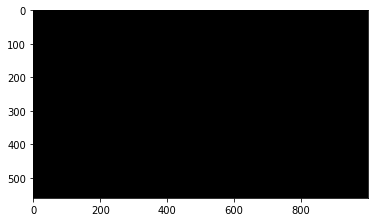

[INFO] Applying sharpen kernel


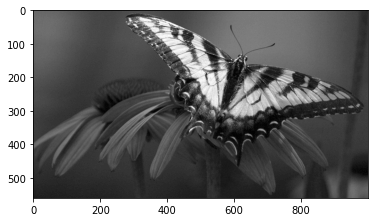

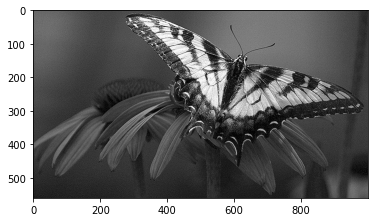

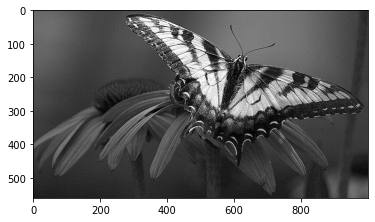

[INFO] Applying laplacian kernel


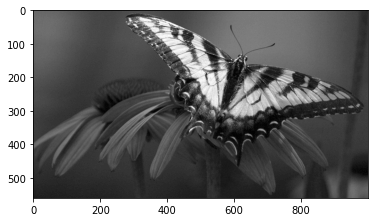

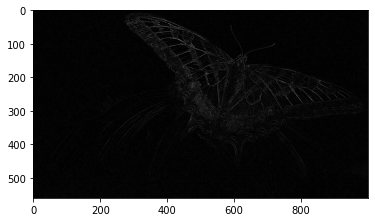

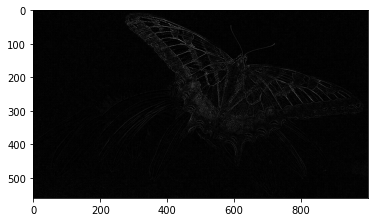

[INFO] Applying sobel_y kernel


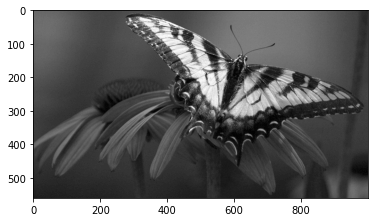

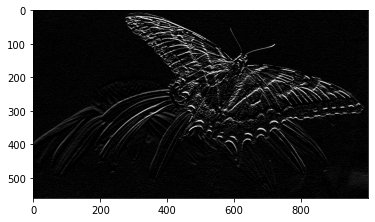

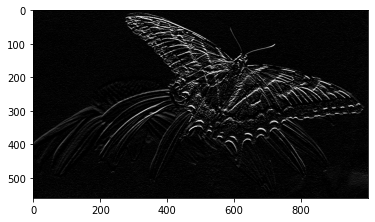

[INFO] Applying sobel_x kernel


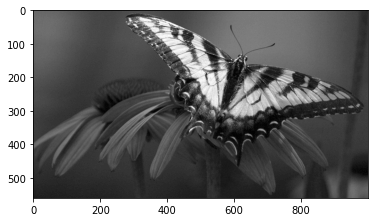

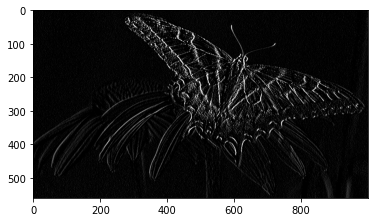

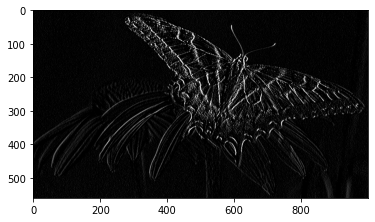

In [0]:
for (name, kernel) in kernel_bank:
  print('[INFO] Applying {} kernel'.format(name))
  convolve_output = convolve(gray, kernel)
  opencv_output = cv2.filter2D(gray, -1, kernel)

  # show original image
  plt.figure()
  plt.imshow(gray, cmap='gray')

  # show image convoluted using our function
  plt.figure()
  plt.imshow(convolve_output, cmap='gray')

  # show image convoluted using opencv built-in function
  plt.figure()
  plt.imshow(opencv_output, cmap='gray')

  plt.show()